In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import sys
import mpu
from collections import Counter
from sklearn.cluster import DBSCAN
import matplotlib as m
%matplotlib inline  

In [5]:
coordinates = [(-0.19962540814214172, 51.476317136255744), (-0.1366378224442588, 51.501127679786194), (-0.028211180680559958, 51.55445176767388), (-0.05471277610023549, 51.56951448689863), (-0.14299132390174857, 51.51375306927039), (-0.074783, 51.524439), (-0.143846, 51.516107), (-0.06089687347412109, 51.53904856950972), (-0.020674467086791992, 51.548263233883084), (-0.07533788681030273, 51.50555046555676), (-0.07015420382994955, 51.52221221813409), (-0.09941296840788552, 51.50786413569818), (-0.09369760683544447, 51.519551964241515), (-0.1268314804653908, 51.51929484401481), (-0.12471199035644531, 51.51475188104656), (-0.0695657730102539, 51.529358148183654), (-0.13443678695369957, 51.510014509348885), (-0.07689, 51.536228), (-0.100035667, 51.51349665), (-0.12696505, 51.490772), (-0.1598543312878728, 51.5095930079147), (-0.12702126588290397, 51.533095043289315), (-0.14232682284552933, 51.51623296673526), (-0.11560320854187012, 51.506244976845146), (-0.01785774003680094, 51.547392228239346), (-0.07530558229019924, 51.549346805555615), (-0.07427993461329559, 51.55888550953273), (-0.17460607849746004, 51.496688072417484), (-0.07127005215588636, 51.55234879756115), (-0.07637766602948082, 51.541270357206876), (-0.11655807495117188, 51.51611390655047), (-0.1519768615275446, 51.54351057106622), (-0.15546423374587737, 51.563659360560024), (-0.07244914770126343, 51.520969129318594), (-0.07819607723100931, 51.51089848289669), (-0.16262635628680888, 51.472823585353815), (-0.14392825746295174, 51.56631591348137), (-0.1916910095867962, 51.50092905882357), (-0.17739225323069288, 51.50100739796971), (-0.17297332521437753, 51.496779665538355), (-0.17196853002772122, 51.49636137382172), (-0.08093427138027941, 51.527406136942915), (-0.04293680191040039, 51.53340274840484), (-0.0715299534213913, 51.52380292069493), (-0.0619053840637207, 51.525333214048985), (-0.1036892309154935, 51.535952617959296), (-0.084021, 51.512924), (-0.055156070792748015, 51.53492224944206), (-0.073568, 51.520652), (-0.12311703428863793, 51.50149829221112), (-0.13124948481986343, 51.51466501460356), (-0.09891691285145286, 51.51354604839221), (-0.21025230413465668, 51.49658797285295), (-0.14384418725967407, 51.50805466326017), (-0.09851234709399286, 51.508681058364616), (-0.09956180642377233, 51.50768445812479), (-0.07715924120789011, 51.50318446840608), (-0.13348896553134687, 51.50853880490306), (-0.11799502010768038, 51.504885536505135), (-0.20428833857863843, 51.5147558935761), (-0.07886767387390137, 51.51835047772569), (-0.07748607400075144, 51.51755145032346), (-0.1596987247467041, 51.55960385011757), (-0.09349158207296704, 51.51958781702969), (-0.072469, 51.524748), (-0.08188247680664062, 51.49950643488766), (-0.09027570662171562, 51.51013518537783), (-0.09096980094909668, 51.51328966127918), (-0.1412409048093013, 51.51201958917497), (-0.13091053587938078, 51.51337693282211), (-0.12617111206054688, 51.53157404627683), (-0.032382309436798096, 51.57975314976618), (-0.15903353691101074, 51.48203100527882), (-0.020127296447753906, 51.5442800054832), (-0.13104, 51.514182), (-0.11482018777550748, 51.50742438494421), (-0.10003928594746672, 51.50723281413592), (-0.14528621827786642, 51.51320602499142), (-0.08713, 51.575668), (-0.1274732405523153, 51.52939262191717), (-0.13220876455307007, 51.5152860135492), (-0.06642759349813168, 51.55448823967383), (-0.13376712799072266, 51.51165378901763), (-0.069551, 51.53007924556732), (-0.1267049831955223, 51.51920757972218), (-0.10866165161132812, 51.4960666562374), (-0.073856, 51.546484), (-0.0787496566772461, 51.50481587478995), (-0.11664729599511395, 51.51057875850128), (-0.08675326419952484, 51.50470257546186), (-0.13840481711428543, 51.50855865837351), (-0.07183084124560873, 51.52109684396697), (-0.07804241539028312, 51.52784454293893), (-0.16492083670596772, 51.55962227214169), (-0.08356690406799316, 51.511146322827294), (-0.019856785845298815, 51.503922072458614), (-0.0764322280883789, 51.51961225598922), (-0.1043701171875, 51.509643922676055), (-0.12259784915783752, 51.50734456581422), (-0.1354515552520752, 51.51007127709456), (-0.05742073059082031, 51.5381259994508), (-0.09438308496570862, 51.5269389506638)]

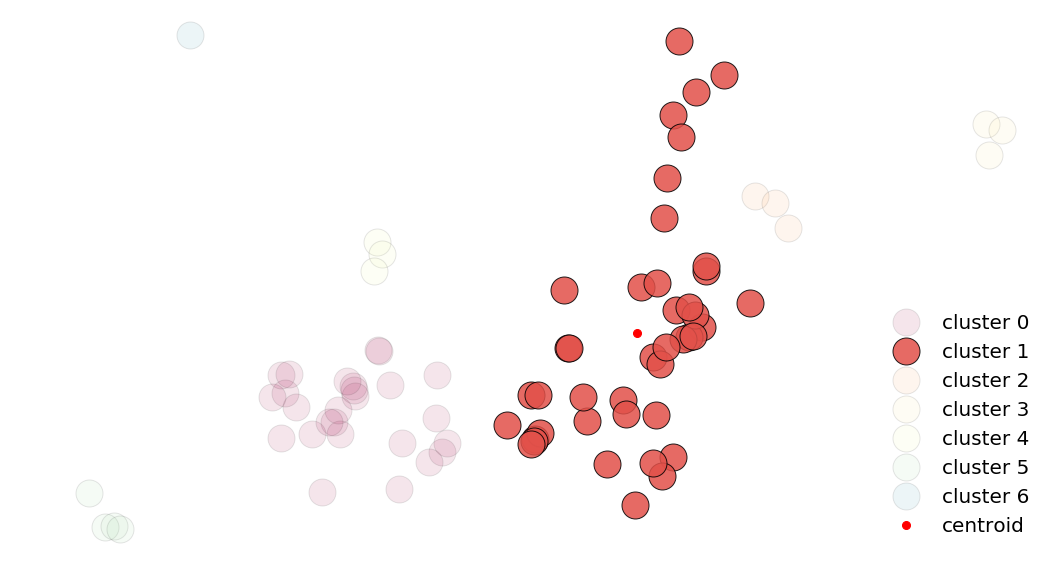

In [42]:
def get_centroids(c):

     return (sum(c[0])/len(c[0]),sum(c[1])/len(c[1]))


def doDBSCAN(X, ax, eps, mins):


    centers = [[1, 1], [-1, -1], [1, -1]]

    #X = StandardScaler().fit_transform(X)

    db = DBSCAN(eps, min_samples=mins).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    


    n_clusters_    = len(set(labels)) - (1 if -1 in labels else 0)
    n_labels       = Counter(labels)
    n_labelss      = Counter([lll for lll in labels if lll > -1])

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)  for each in np.linspace(0, 1, len(unique_labels))]
    centr  = []    
  


    if len(n_labelss) > 1:

        biggestcluster = n_labelss.most_common(1)[0][0]

        
        
        for k, col in zip(unique_labels, colors):

            class_member_mask = (labels == k)
            xy = X[class_member_mask & core_samples_mask]

            
            if len(xy) > 0:    
             
                if k == -1:
                    col = [0, 0, 0, 1]

                xy = X[class_member_mask & core_samples_mask]
                
 
                alpha__ = 0.10
        
                if k == biggestcluster:
                    centr = get_centroids(list(zip(*[(cc[0], cc[1]) for cc in  list(X[class_member_mask])])))
                    alpha__ = 0.85
        
                ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),  markeredgecolor='k', markersize=27, alpha = alpha__, label = 'cluster ' + str(k))
                ax.legend(loc = 'left', fontsize = 30)           
        
    
    return centr
        

    
    
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html    

eps  = 0.01
mins = 3


f, ax = plt.subplots(1, 1, figsize=(18, 10)) 
x     = np.asarray(coordinates)
centr = doDBSCAN(x, ax, eps, mins) 
ax.plot(centr[0], centr[1], 'ro', markersize = 8, label = 'centroid', alpha =1)
ax.legend( fontsize = 20, frameon=False)
plt.axis('off')
plt.savefig('../../Pres/dbscan2.png')
plt.show()


